In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from skimage.io import imread


In [ ]:
def get_affine_transform(pts1,pts2):
    A=np.zeros((len(pts1)*2,6))
    b=np.zeros(len(pts1)*2)
    M=np.zeros((2,3))
    for i in range(len(pts1)):
        A[i*2,0]=pts1[i][0]
        A[i*2,1]=pts1[i][1]
        A[i*2,2]=1
        A[i*2+1,3]=pts1[i][0]
        A[i*2+1,4]=pts1[i][1]
        A[i*2+1,5]=1
        b[i*2]=pts2[i][0]
        b[i*2+1]=pts2[i][1]
        
    P=np.linalg.pinv(A).dot(b)
    M[0,:]=P[:3]
    M[1,:]=P[3:6]
    return M

In [4]:
def recoverTransformation(img1, img2,n_pts):
    #Image1 and Image2 are original and transformed input image
    #respectively
    #MSEPix is mean squared error of pixels of T_image and Image2
    #MSECorPts is mean squared error of correspondence points and
    #transformed points
    #T is recovered transformation
    #T_Image is transformed Image
    %matplotlib qt
    plt.figure()
    plt.imshow(img1)
    print("Select 8 points")
    pts1=plt.ginput(n=n_pts,timeout=0)
    plt.show()
    plt.figure()
    plt.imshow(img2)
    print("Select corresponding 8 points in target image")
    pts2=plt.ginput(n=n_pts,timeout=0)
    plt.show()

    T=get_affine_transform(pts1,pts2)
    T_Image = cv2.warpAffine(img1, T, (img2.shape[1], img2.shape[0]))

    %matplotlib inline
    plt.figure()
    plt.imshow(T_Image)
    plt.title("Result")
    plt.figure()
    plt.imshow(img2)
    plt.title("Original")



    MSEPix = np.mean((T_Image-img2)**2)

    MSECorPts = np.mean((np.array([T.dot(np.array([p[0],p[1],1])) for p in np.array(pts1,dtype="int")])-np.array(pts2,dtype="int"))**2)

    return [MSEPix, MSECorPts, T, T_Image]

## Arfa

Text(0.5, 1.0, 'Image 2')

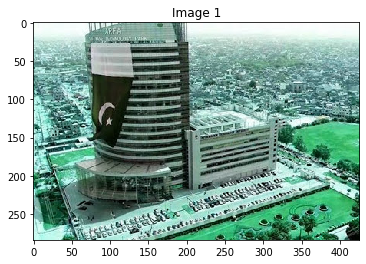

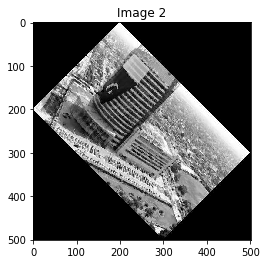

In [15]:
img1=cv2.imread("task1/arfa1.jpg")
img2=cv2.imread("task1/arfa2.jpg")
plt.figure()
plt.imshow(img1)
plt.title("Image 1")
plt.figure()
plt.imshow(img2)
plt.title("Image 2")

Select 8 points
Select corresponding 8 points in target image


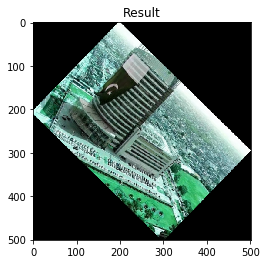

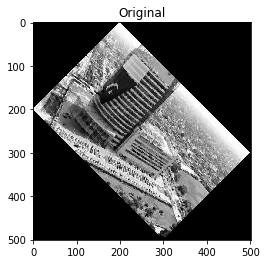

In [16]:
MSEPix, MSECorPts, T, T_Image= recoverTransformation(img1, img2,8)

In [17]:
MSEPix, MSECorPts,T

(46.90202960678776,
 0.9547222196892924,
 array([[  0.71016433,  -0.71202104, 197.70871748],
        [  0.6968648 ,   0.73510661,  -1.39909062]]))

## Mecca

Text(0.5, 1.0, 'Image 2')

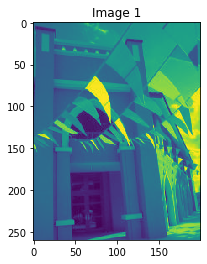

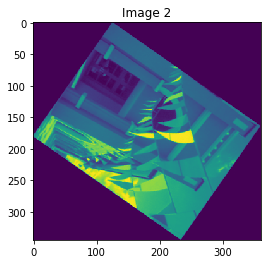

In [18]:
img1=imread("task1/mecca1.jpg")
img2=imread("task1/mecca2.jpg")
plt.figure()
plt.imshow(img1)
plt.title("Image 1")
plt.figure()
plt.imshow(img2)
plt.title("Image 2")

Select 8 points
Select corresponding 8 points in target image


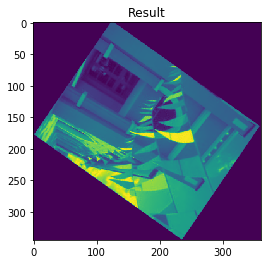

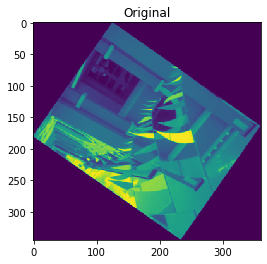

In [19]:
MSEPix, MSECorPts, T, T_Image= recoverTransformation(img1, img2,8)

In [20]:
MSEPix, MSECorPts,T

(19.688739009996386,
 2.0625673621367753,
 array([[ -0.61565994,  -0.90032912, 357.68573428],
        [  0.89945749,  -0.6398042 , 164.08715454]]))

## Station

Text(0.5, 1.0, 'Image 2')

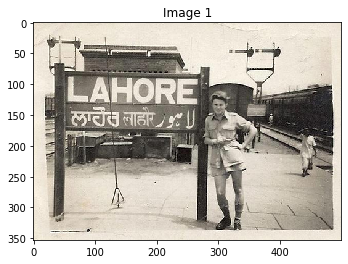

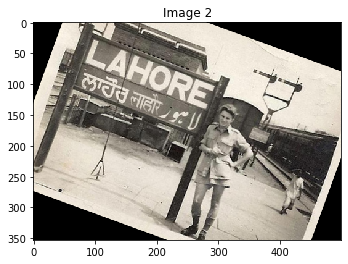

In [11]:
img1=imread("task1/station1.png")
img2=imread("task1/station2.png")
plt.figure()
plt.imshow(img1)
plt.title("Image 1")
plt.figure()
plt.imshow(img2)
plt.title("Image 2")

Select 8 points
Select corresponding 8 points in target image


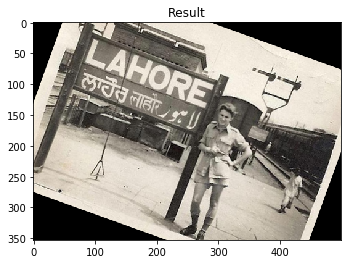

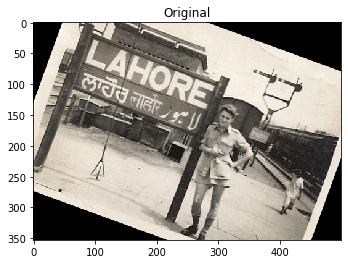

In [12]:
MSEPix, MSECorPts, T, T_Image= recoverTransformation(img1, img2,8)

In [14]:
MSEPix, MSECorPts,T

(42.0463059490085,
 0.5895423091151492,
 array([[  0.93474596,  -0.34301521,  75.1786298 ],
        [  0.33546502,   0.94698853, -75.43842655]]))